In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# !pip install fastai==1.0.61
# !pip install torch==1.4.0
# !pip install torchvision==0.5.0

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
import torch
from fastai.metrics import *


In [5]:
torch.cuda.is_available()

True

In [6]:
bs = 128

In [7]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [8]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [9]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [10]:
path_anno = path/'annotations'
path_img = path/'images'

In [11]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_173.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_120.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_26.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_86.jpg')]

In [12]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [13]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

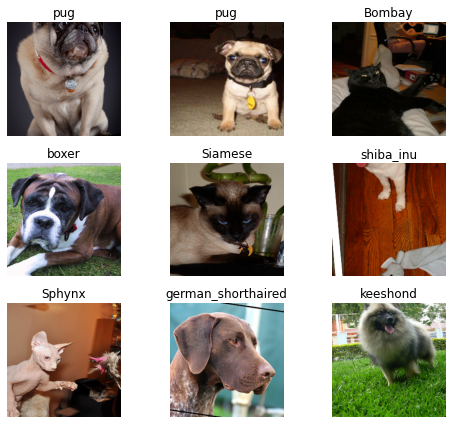

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

### Custom model Pytorch


In [16]:
# from torchvision import models 
# model = models.resnet34(pretrained=True).cuda()
# for param in model.parameters():
#     param.requires_grad=False
# model.fc = nn.Sequential(
#                nn.Linear(512, 256),
#                nn.ReLU(inplace=True),
#     nn.Linear(256,128),
#     nn.ReLU(inplace=True),
#     nn.Dropout2d(p=0.3),
#     nn.Linear(128,37)).cuda()

In [17]:
# from torchvision.models import *
# model = models.resnet18(pretrained=True).cuda()
# for param in model.parameters():
#     param.requires_grad=False



In [18]:
import torchvision
model = torchvision.models.mobilenet_v2(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [19]:
# model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)

In [20]:
for param in model.parameters():
    param.requires_grad=False

In [21]:
from torch import nn
model.classifier[1] =  nn.Sequential(
               nn.Linear(1280, 37))

In [22]:
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [23]:
precision=Precision()
recall=Recall()
matthews=MatthewsCorreff()
roc_auc_score=AUROC()

In [24]:
learn = Learner(data,model,metrics=[error_rate,accuracy,precision,recall,roc_auc_score,matthews],callback_fns=[ShowGraph])

In [76]:
#learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [25]:
learn.model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [26]:
learn.summary()

MobileNetV2
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [32, 112, 112]       864        False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         False     
______________________________________________________________________
ReLU6                [32, 112, 112]       0          False     
______________________________________________________________________
Conv2d               [32, 112, 112]       288        False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         False     
______________________________________________________________________
ReLU6                [32, 112, 112]       0          False     
______________________________________________________________________
Conv2d               [16, 112, 112]       512        False     
__________________________________________________

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,auroc,matthews_correff,time


In [80]:
torch.save(learn.model.state_dict(),'/content/mobilenet_weight_exp.pth')

In [51]:
# learn.save('/content/stage-1')

## Results

In [81]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

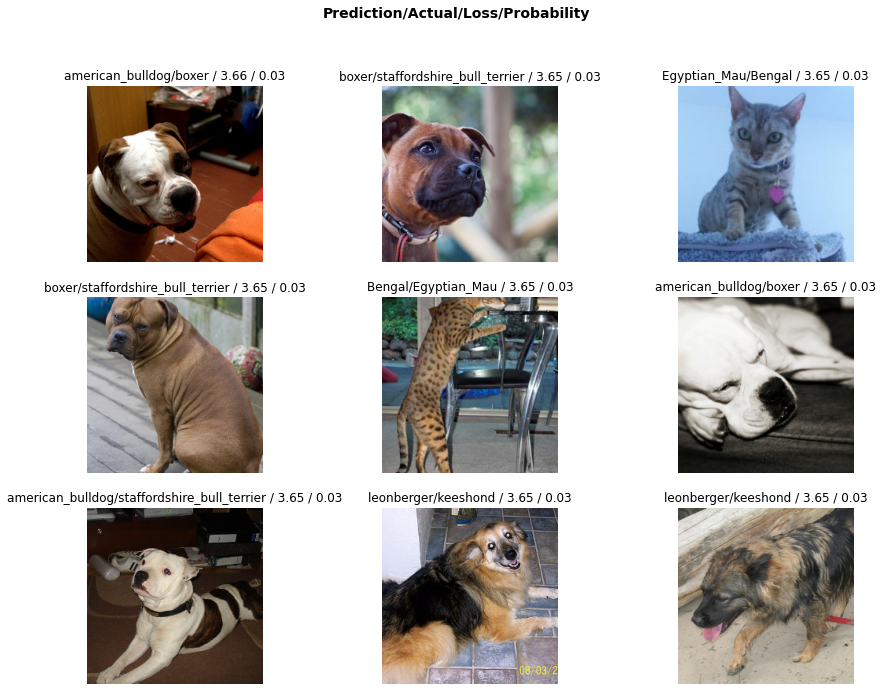

In [82]:
interp.plot_top_losses(9, figsize=(15,11))

In [83]:
doc(interp.plot_top_losses)

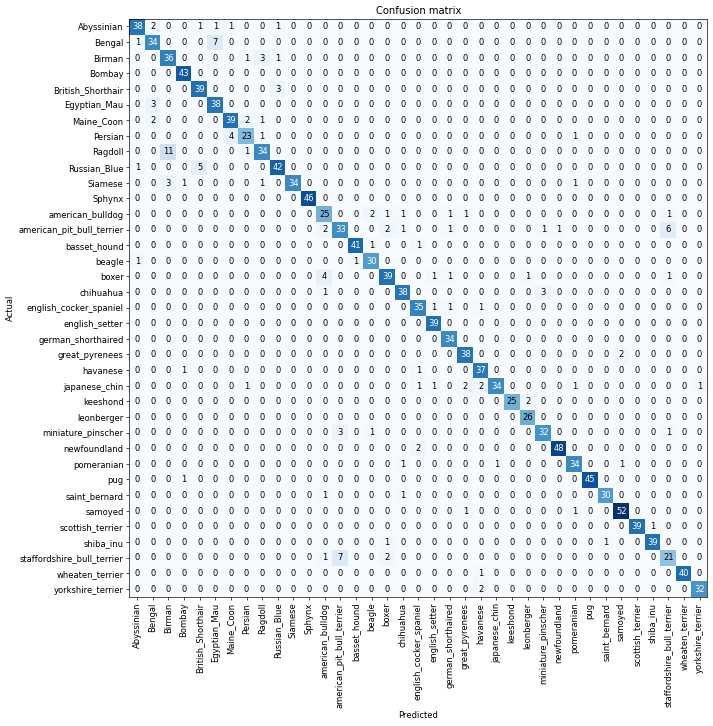

In [84]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### ONNX

In [56]:
# !pip install onnxruntime==1.12.1
# !pip install onnx==1.12.0

In [85]:
from torch.autograd import Variable
import io
import numpy as np
from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx
import torchvision
import torch

In [86]:
# Input to the model
x = torch.randn(1,3, 224,224, requires_grad=False).cuda()
torch_out = learn.model(x);

In [87]:
# Export the model
torch.onnx.export(learn.model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "custom_model_mobilenet_pytorch_softmax_v91.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=9,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  )

In [88]:
import onnx
onnx_model = onnx.load("/content/custom_model_mobilenet_pytorch_softmax_v91.onnx")
onnx.checker.check_model(onnx_model)

In [89]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("/content/custom_model_mobilenet_pytorch_softmax_v91.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()


# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(x)}
ort_outs = ort_session.run(None, ort_inputs)
print(ort_outs[0])
# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

[[0.016688 0.011347 0.033273 0.073852 0.115601 0.041026 0.082573 0.071299 0.133231 0.051051 0.052881 0.049416 0.009409
  0.001963 0.008717 0.068335 0.009029 0.005496 0.032414 0.002859 0.035759 0.002985 0.012986 0.009385 0.004907 0.000872
  0.003357 0.001884 0.001391 0.002845 0.002543 0.009285 0.006564 0.004876 0.007509 0.01279  0.009602]]
Exported model has been tested with ONNXRuntime, and the result looks good!


## Pytorch Custom inf

In [ ]:
from torchvision import models 

In [ ]:
model = models.resnet34(pretrained=False).cuda()
model.fc = nn.Sequential(
               nn.Linear(512, 256),
               nn.ReLU(inplace=True),
    nn.Linear(256,128),
    nn.ReLU(inplace=True),
    nn.Dropout2d(p=0.3),
    nn.Linear(128,37)).cuda()

In [ ]:
model.load_state_dict(torch.load('/content/weight_exp.pth'))

<All keys matched successfully>

In [ ]:
fmodel = model.eval()

### ONNX to ORT conversion

In [14]:
!python -m onnxruntime.tools.convert_onnx_models_to_ort "/content/custom_model_pytorch_v9.onnx"

Converting models with optimization style 'Fixed' and level 'all'
Converting optimized ONNX model /content/custom_model_pytorch_v9.onnx to ORT format model /content/custom_model_pytorch_v9.ort
Converted 1/1 models successfully.
Generating config file from ORT format models with optimization style 'Fixed' and level 'all'
2022-08-30 05:45:16,636 ort_format_model.utils [INFO] - Created config in /content/custom_model_pytorch_v9.required_operators.config
Converting models with optimization style 'Runtime' and level 'all'
Converting optimized ONNX model /content/custom_model_pytorch_v9.onnx to ORT format model /content/custom_model_pytorch_v9.with_runtime_opt.ort
Converted 1/1 models successfully.
Converting models again without runtime optimizations to generate a complete config file. These converted models are temporary and will be deleted.
Converting optimized ONNX model /content/custom_model_pytorch_v9.onnx to ORT format model /content/tmpyccsogk2.without_runtime_opt/custom_model_pytorc